*Name* : Sanket S Houde

*Roll no* : 18387

# Model 1


In [ ]:
# Imports and formatting the data

from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)



Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 180)               141300    
_________________________________________________________________
dense_25 (Dense)             (None, 30)                5430      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_28 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_29 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_30 (Dense)             (None, 30)               

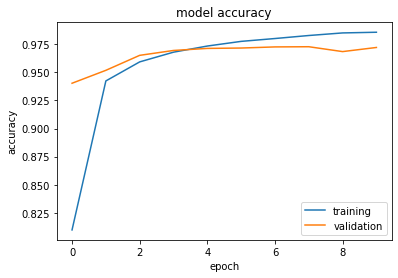

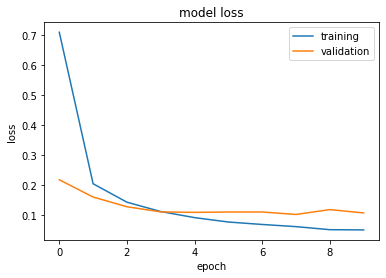

Test loss: 0.111
Test accuracy: 0.971


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=180, activation='relu', input_shape=(image_size,)))

for i in range(1,7):
   model.add(Dense(units=30,activation='relu'))

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

# accuracy is the percent of predictions that were correct.
model.compile(optimizer="nadam", loss='kullback_leibler_divergence', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=10, verbose=True, validation_split=.1)

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

# Model-2

In [ ]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 180)               141300    
_________________________________________________________________
dense_57 (Dense)             (None, 50)                9050      
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_20 (Dropout)         (None, 50)              

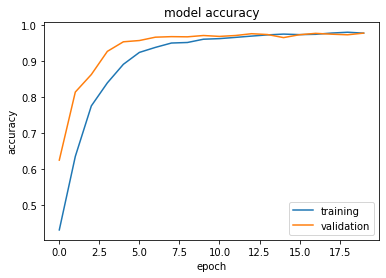

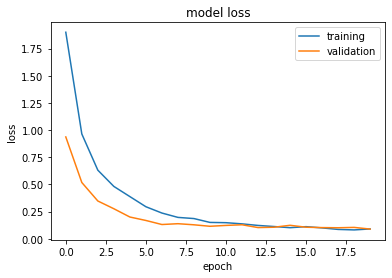

Test loss: 0.111
Test accuracy: 0.974


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Sequential models are a series of layers applied linearly.
model = Sequential()

# Early stopping statement declaration
early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=180, activation='relu', input_shape=(image_size,)))

for i in range(1,7):
   model.add(Dense(units=50,activation='relu'))
   model.add(Dropout(rate=0.1))

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

# accuracy is the percent of predictions that were correct.
model.compile(optimizer="nadam", loss='categorical_crossentropy', metrics=['accuracy'])

# This function provides useful text data for our network
model.summary()


# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 10 times (10 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=True, validation_split=.1,callbacks=[early_stopper])

loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')